# Node TPM

In [1]:
import numpy as np
import pandas as pd

import pyphi.data_models as dm  # Prototype code
import networkx as nx
from networkx.drawing.nx_pydot import pydot_layout
from pyphi.convert import sbs2sbn, sbn2sbs      

import pyphi
import numpy as np
from pprint import pprint

# Setup Propagation Delay Network

Edges = [('A', 'B'), ('A', 'I'), ('B', 'D'), ('C', 'A'), ('D', 'C'), ('D', 'E'), ('E', 'G'), ('F', 'D'), ('G', 'F'), ('G', 'H'), ('H', 'A'), ('I', 'G')]


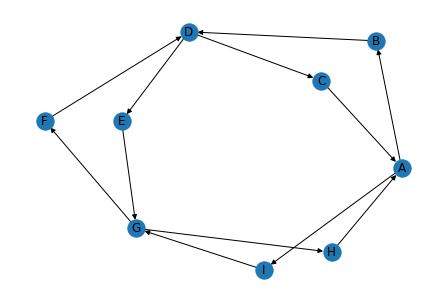

In [2]:
# from examples.py
cm = np.array([
        [0, 1, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
    ])
G = nx.DiGraph(cm)  # networkx graph from CM
# Nodes can have 0..15 states; default set by SpN but can be overwritten after net created.
net = dm.Net(edges=G.edges(), SpN=2, func=dm.copy_func) # create network of binary nodes, default node func
# Set node funcs for nodes that are not the default
net.get_node('A').func = dm.or_func
net.get_node('D').func = dm.xor_func
net.get_node('G').func = dm.and_func
print(f'Edges = {net.graph.edges()}') #these are the actual edges
net.draw()

In [3]:
net.states.eval_node('G','000010001')

'1'

In [4]:
# probabability distribution of node states
net.states.node_tpm('G','000010001')  # => [0,1]

[0.0, 1.0]